<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/Gaussian_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount("/content/drive")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
file_path = "/content/drive/MyDrive/spam.csv"

# Read the CSV file
df = pd.read_csv(file_path, encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print(df.head())


   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [12]:
from sklearn.model_selection import train_test_split

# Feature Engineering: Extract numerical features
df['text_length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))

#define features and target

x = df[['text_length','num_words','num_digits']]
y = df['label']

#split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)
y_pred_gnb = gnb.predict(x_test_scaled)

In [19]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_gnb)
print("Accuracy:",accuracy)



Accuracy: 0.9814593301435407


In [20]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_gnb)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[1438   15]
 [  16  203]]


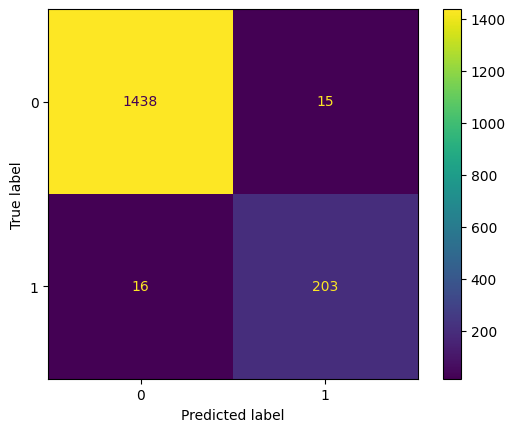

In [22]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=gnb.classes_)
disp.plot()
plt.show()

Multinomial naive Bayes


In [24]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB



# Convert text data into word count vectors
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])

# Convert counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()  # it will calculate frequency of words
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['label'], test_size=0.2, random_state=42
)

# Train Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)


In [36]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_mnb)
print("Accuracy:",accuracy)



Accuracy: 0.968609865470852


In [28]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_mnb)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[965   0]
 [ 35 115]]


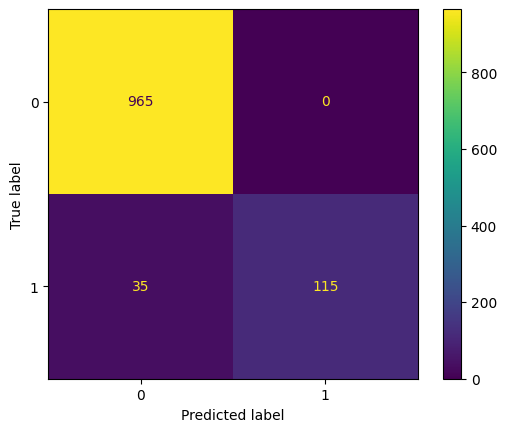

In [29]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=mnb.classes_)
disp.plot()
plt.show()

Bernouli Naive Bayex (For Binary Features)

In [30]:
# Convert text into binary presence/absence of important words
important_words = ['free', 'win', 'offer', 'money', 'urgent']

for word in important_words:
    df[word] = df['text'].apply(lambda x: 1 if word in x.lower() else 0)


In [44]:
X = df[important_words]
y = df['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [50]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

In [51]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_bnb)
print("Accuracy:",accuracy)



Accuracy: 0.895067264573991


In [52]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_pred_bnb)
print("Confusion Matrix:")
print(confusion)





Confusion Matrix:
[[929  36]
 [ 81  69]]


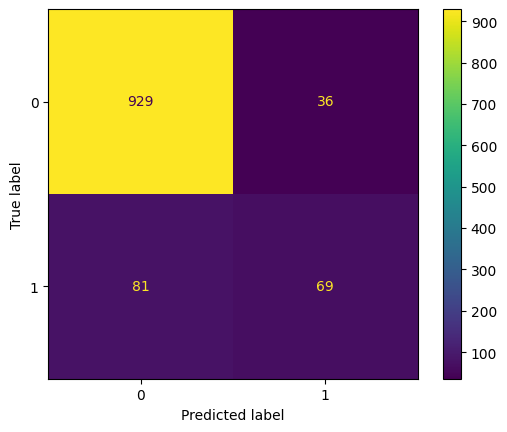

In [53]:
import matplotlib.pyplot as plt

#dispaly confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=bnb.classes_)
disp.plot()
plt.show()